# Exploring NASA Exoplanet Data
## Import Libraries and Load Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv(r"C:\Users\madha\Downloads\12310219-PA\nasa_exoplanets.csv", sep=',')
df.head()


,loc_rowid,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,-0.05000,0.0,1.178,0.000,0.00,0.0,12.2,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4914.898486,39.092894,-39.728551,0.0,15.464,0.123,-0.125,0.0,Msini,0.238,0.007,-0.007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G8 III,4874.0,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.640,-0.630,0.0,-0.2600,0.1000,-0.1000,0.0,[Fe/H],2.45,0.08,-0.08,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,-3.20000,0.0,1.530,0.070,-0.07,0.0,12.3,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4684.814200,794.575000,-794.575000,0.0,14.740,2.500,-2.500,0.0,Msini,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K4 III,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,2.78,0.690,-0.690,0.0,-0.0200,NaN,NaN,0.0,[Fe/H],1.93,0.07,-0.07,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.9765,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,-0.12000,0.0,0.775,0.000,0.00,0.0,13.1,NaN,NaN,0.0,1.16,NaN,NaN,0.0,1131.151301,36.232438,-38.775066,0.0,3.559,0.114,-0.122,0.0,Msini,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 III,4888.0,NaN,NaN,0.0,11.55,1.12,-0.51,0.0,1.78,0.430,-0.290,0.0,-0.2100,0.1000,-0.1000,0.0,[Fe/H],2.55,0.06,-0.07,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.7140,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,-1.87256,0.0,2.774,0.109,-0.12,0.0,12.6,NaN,NaN,0.0,1.12,NaN,NaN,0.0,2559.472162,518.695960,-280.642483,0.0,8.053,1.632,-0.883,0.0,Mass,0.373,0.008,-0.006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0V,5338.0,25.0,-25.0,0.0,0.93,0.01,-0.01,0.0,0.91,0.113,-0.113,0.0,0.4052,0.0466,-0.0466,0.0,[Fe/H],4.45,0.02,-0.02,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.0073,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,-1.00000,0.0,1.660,0.030,-0.03,0.0,13.5,NaN,NaN,0.0,1.20,NaN,NaN,0.0,565.737400,25.426400,-25.426400,0.0,1.780,0.080,-0.080,0.0,Msini,0.680,0.020,-0.020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G3 V,5750.0,8.0,-8.0,0.0,1.13,0.01,-0.01,0.0,1.08,0.040,-0.040,0.0,0.0600,NaN,NaN,0.0,[Fe/H],4.36,0.01,-0.01,0.0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,0.0110,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


## Basic Dataset Overview

In [21]:
df.shape

(6061, 85)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        6061 non-null   int64  
 1   pl_name          6061 non-null   object 
 2   hostname         6061 non-null   object 
 3   sy_snum          6061 non-null   int64  
 4   sy_pnum          6061 non-null   int64  
 5   discoverymethod  6061 non-null   object 
 6   disc_year        6061 non-null   int64  
 7   disc_facility    6061 non-null   object 
 8   pl_controv_flag  6061 non-null   int64  
 9   pl_orbper        5744 non-null   float64
 10  pl_orbpererr1    5250 non-null   float64
 11  pl_orbpererr2    5250 non-null   float64
 12  pl_orbperlim     5744 non-null   float64
 13  pl_orbsmax       5758 non-null   float64
 14  pl_orbsmaxerr1   3814 non-null   float64
 15  pl_orbsmaxerr2   3814 non-null   float64
 16  pl_orbsmaxlim    5759 non-null   float64
 17  pl_rade       

## Key Columns and Missing Values

In [23]:
key_columns = [
    "discoverymethod",
    "pl_orbper",
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "st_teff",
    "st_mass"
]

df[key_columns].isnull().sum()

discoverymethod       0
pl_orbper           317
pl_rade              50
pl_bmasse            31
pl_eqt             1535
st_teff             276
st_mass               7
dtype: int64

## Target Variable: Discovery Method

In [34]:
df["discoverymethod"].value_counts().head(10)

discoverymethod
Transit                          4472
Radial Velocity                  1157
Microlensing                      262
Imaging                            89
Transit Timing Variations          39
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       8
Astrometry                          5
Pulsation Timing Variations         2
Name: count, dtype: int64

C:\Users\madha\AppData\Local\Temp\ipykernel_14632\153030256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


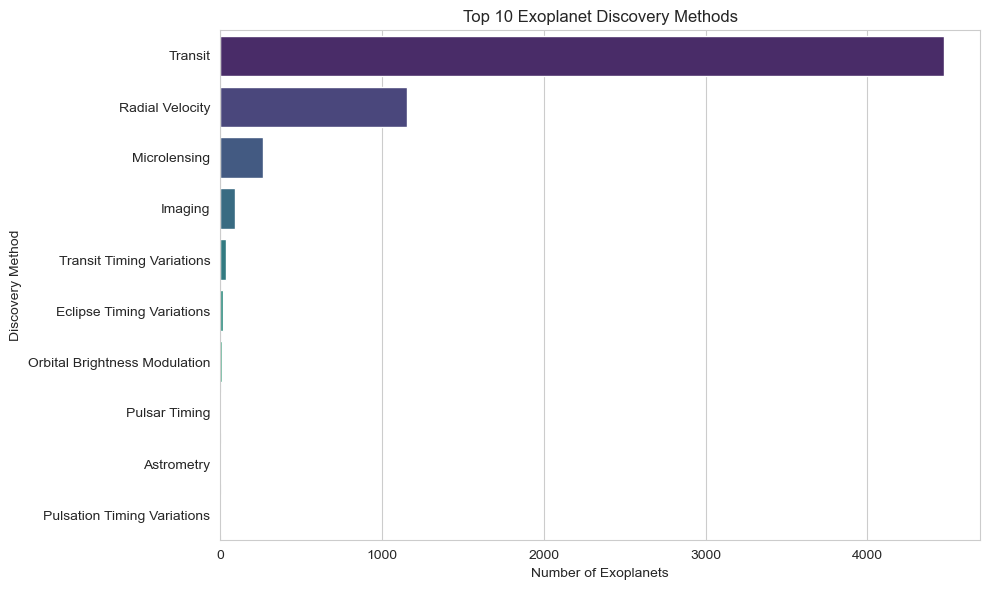

In [35]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    y="discoverymethod",
    order=df["discoverymethod"].value_counts().head(10).index,
    palette="viridis"
)

plt.title("Top 10 Exoplanet Discovery Methods")
plt.xlabel("Number of Exoplanets")
plt.ylabel("Discovery Method")

plt.tight_layout()
plt.show()

## Planetary and Stellar Feature Distributions

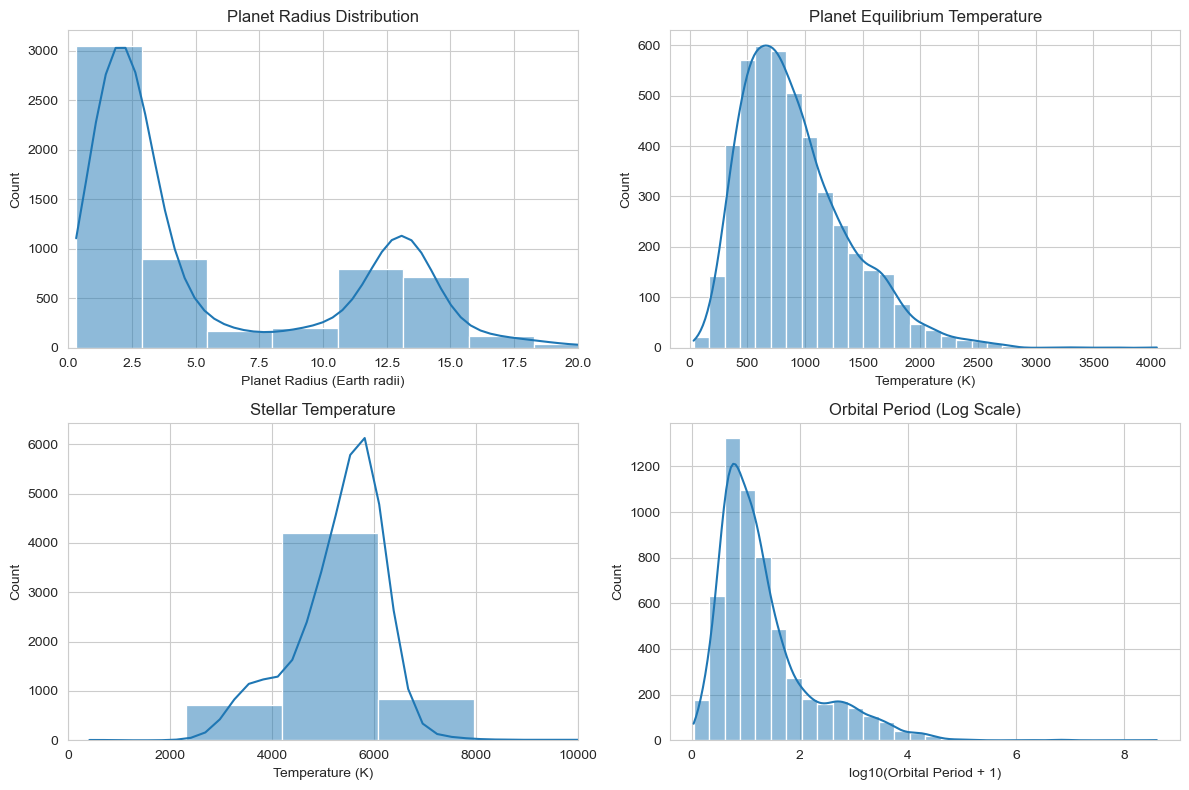

In [36]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 1. Planet Radius
plt.subplot(2, 2, 1)
sns.histplot(df["pl_rade"], bins=30, kde=True)
plt.xlim(0, 20)
plt.title("Planet Radius Distribution")
plt.xlabel("Planet Radius (Earth radii)")

# 2. Planet Equilibrium Temperature
plt.subplot(2, 2, 2)
sns.histplot(df["pl_eqt"], bins=30, kde=True)
plt.title("Planet Equilibrium Temperature")
plt.xlabel("Temperature (K)")

# 3. Stellar Temperature
plt.subplot(2, 2, 3)
sns.histplot(df["st_teff"], bins=30, kde=True)
plt.xlim(0, 10000)
plt.title("Stellar Temperature")
plt.xlabel("Temperature (K)")

# 4. Orbital Period (log)
plt.subplot(2, 2, 4)
sns.histplot(np.log10(df["pl_orbper"] + 1), bins=30, kde=True)
plt.title("Orbital Period (Log Scale)")
plt.xlabel("log10(Orbital Period + 1)")

plt.tight_layout()
plt.show()

## Relationships Between Features

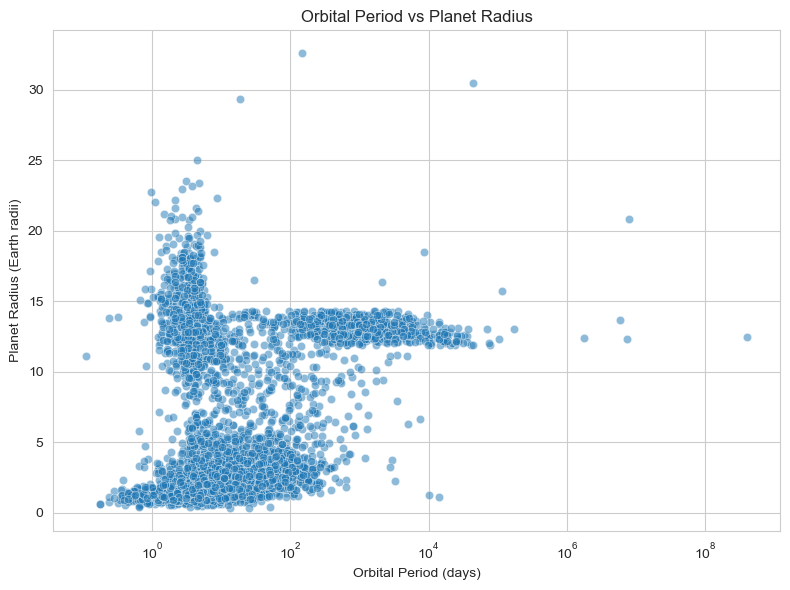

In [37]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=df,
    x="pl_orbper",
    y="pl_rade",
    alpha=0.5
)

plt.xscale("log")
plt.xlabel("Orbital Period (days)")
plt.ylabel("Planet Radius (Earth radii)")
plt.title("Orbital Period vs Planet Radius")

plt.tight_layout()
plt.show()

## Correlation Analysis (Selected Features)

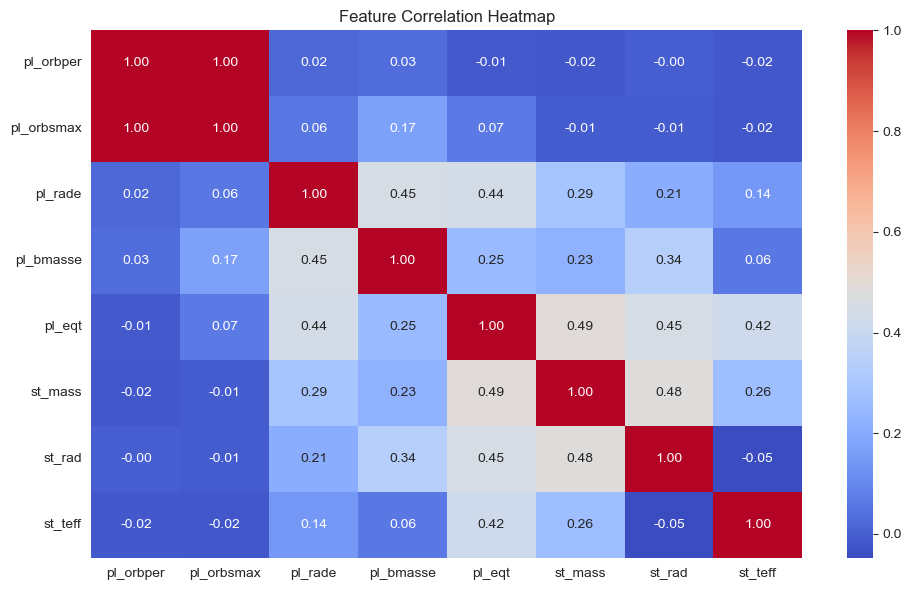

In [38]:
features = [
    "pl_orbper",
    "pl_orbsmax",
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "st_mass",
    "st_rad",
    "st_teff"
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


## Summary of Exploratory Analysis

- The dataset contains confirmed exoplanetary, stellar, and discovery-related parameters.
- Key features show wide variability and differing levels of missing data.
- Discovery methods are unevenly distributed.
- Planetary and stellar properties exhibit diverse distributions and relationships.

This exploratory analysis informs preprocessing and modeling decisions in subsequent modules.
